In [1]:
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['science','ieee'])
import pickle
from rich.progress import track
import os
from itertools import combinations
from numpy import array

In [2]:
#
with open('readings_timeid.pkl','rb') as f:
    results = pickle.load(f)

In [3]:
#
total_id_list = [  
         3,   5,   7,   8,   9,  10,  11,  12,  13,  14,  15,  17,  18,
        19,  21,  23,  24,  25,  26,  27,  30,  31,  32,  33,  34,  35,
        36,  37,  39,  40,  41,  42,  43,  44,  45,  46,  47,  49,  50,
        51,  53,  54,  55,  56,  57,  59,  60,  61,  62,  63,  64,  65,
        66,  68,  69,  70,  71,  72,  73,  75,  76,  79,  80,  81,  82,
        84,  85,  87,  88,  89,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 103, 104, 105, 106, 107, 109, 111, 121, 122]

In [4]:
#
results_ones = np.zeros_like(results)
results_ones[np.where(results > 0)] = 1

In [5]:
pairs = [[14, array([ 3, 23, 42])],
 [15, array([ 5, 17])],
 [24, array([21, 26, 41])],
 [25, array([14, 30, 39, 56])],
 [26, array([  9,  15,  18,  24,  37,  44, 105, 121])],
 [27, array([12, 45, 46])],
 [28, array([ 8, 25, 36])],
 [33, array([64, 75, 99])],
 [36, array([13, 40])],
 [37, array([ 34,  43, 106])],
 [53, array([ 70, 122])],
 [54, array([49, 68])],
 [63, array([66, 72])],
 [64, array([54, 73])],
 [66, array([ 32,  35,  50,  94, 107])],
 [69, array([79, 95])],
 [75, array([92, 97])],
 [77, array([33, 53])],
 [78, array([10, 19])],
 [91, array([85, 89])]]

In [6]:
comb = [(3, 23),
 (3, 42),
 (23, 42),
 (5, 17),
 (21, 26),
 (21, 41),
 (26, 41),
 (14, 30),
 (14, 39),
 (14, 56),
 (30, 39),
 (30, 56),
 (39, 56),
 (9, 15),
 (9, 18),
 (9, 24),
 (9, 37),
 (9, 44),
 (9, 105),
 (9, 121),
 (15, 18),
 (15, 24),
 (15, 37),
 (15, 44),
 (15, 105),
 (15, 121),
 (18, 24),
 (18, 37),
 (18, 44),
 (18, 105),
 (18, 121),
 (24, 37),
 (24, 44),
 (24, 105),
 (24, 121),
 (37, 44),
 (37, 105),
 (37, 121),
 (44, 105),
 (44, 121),
 (105, 121),
 (12, 45),
 (12, 46),
 (45, 46),
 (8, 25),
 (8, 36),
 (25, 36),
 (64, 75),
 (64, 99),
 (75, 99),
 (13, 40),
 (34, 43),
 (34, 106),
 (43, 106),
 (70, 122),
 (49, 68),
 (66, 72),
 (54, 73),
 (32, 35),
 (32, 50),
 (32, 94),
 (32, 107),
 (35, 50),
 (35, 94),
 (35, 107),
 (50, 94),
 (50, 107),
 (94, 107),
 (79, 95),
 (92, 97),
 (33, 53),
 (10, 19),
 (85, 89)]

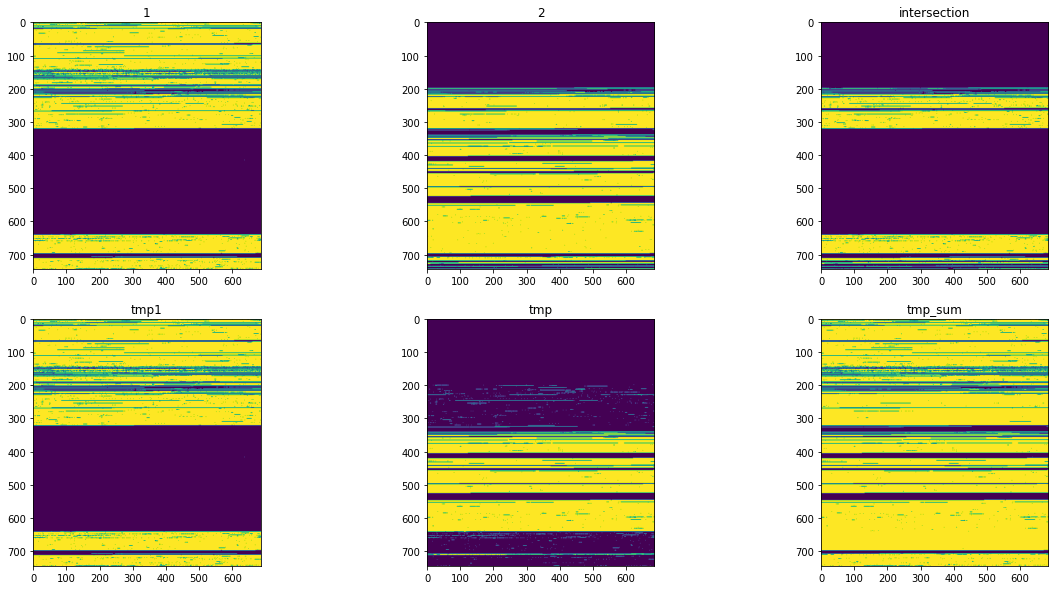

In [7]:
# 验证
# 将comb的1变成0，同时形成新的results
comb_list = [38,48,53,67,68,72]
for item in comb_list[:1]:
    # print(comb[item])
    plt.figure(figsize=(20,10))
    intersection_comb = results_ones.T[comb[item][0]] * results_ones.T[comb[item][1]]

    locs = np.where(intersection_comb > 0)

    tmp1 = results_ones.T[comb[item][0]].copy()
    tmp = results_ones.T[comb[item][1]].copy()
    tmp[locs] = 0

    plt.subplot(231)
    plt.imshow(results_ones.T[comb[item][0]].reshape(745,686))
    plt.title('1')
    plt.subplot(232)
    plt.imshow(results_ones.T[comb[item][1]].reshape(745,686))
    plt.title('2')
    plt.subplot(233)
    plt.imshow(intersection_comb.reshape(745,686))
    plt.title('intersection')
    plt.subplot(234)
    plt.imshow(tmp1.reshape(745,686))
    plt.title('tmp1')
    plt.subplot(235)
    plt.imshow(tmp.reshape(745,686))
    plt.title('tmp')
    plt.subplot(236)
    plt.imshow((tmp+tmp1).reshape(745,686))
    plt.title('tmp_sum')

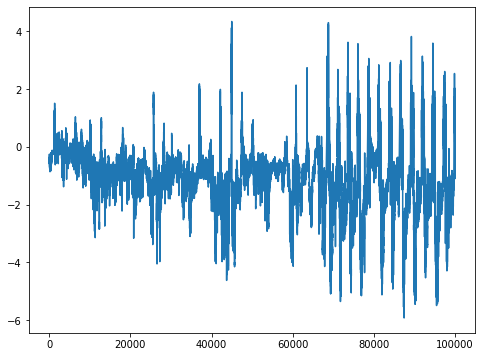

In [18]:
intersection_comb = results_ones.T[comb[item][0]] * results_ones.T[comb[item][1]]
locs = np.where(intersection_comb > 0)

intersection_readings1 = results.T[comb[item][0]][locs]
intersection_readings2 = results.T[comb[item][1]][locs]

plt.figure(figsize=(8,6))
plt.plot((intersection_readings1-intersection_readings2)[:100000])

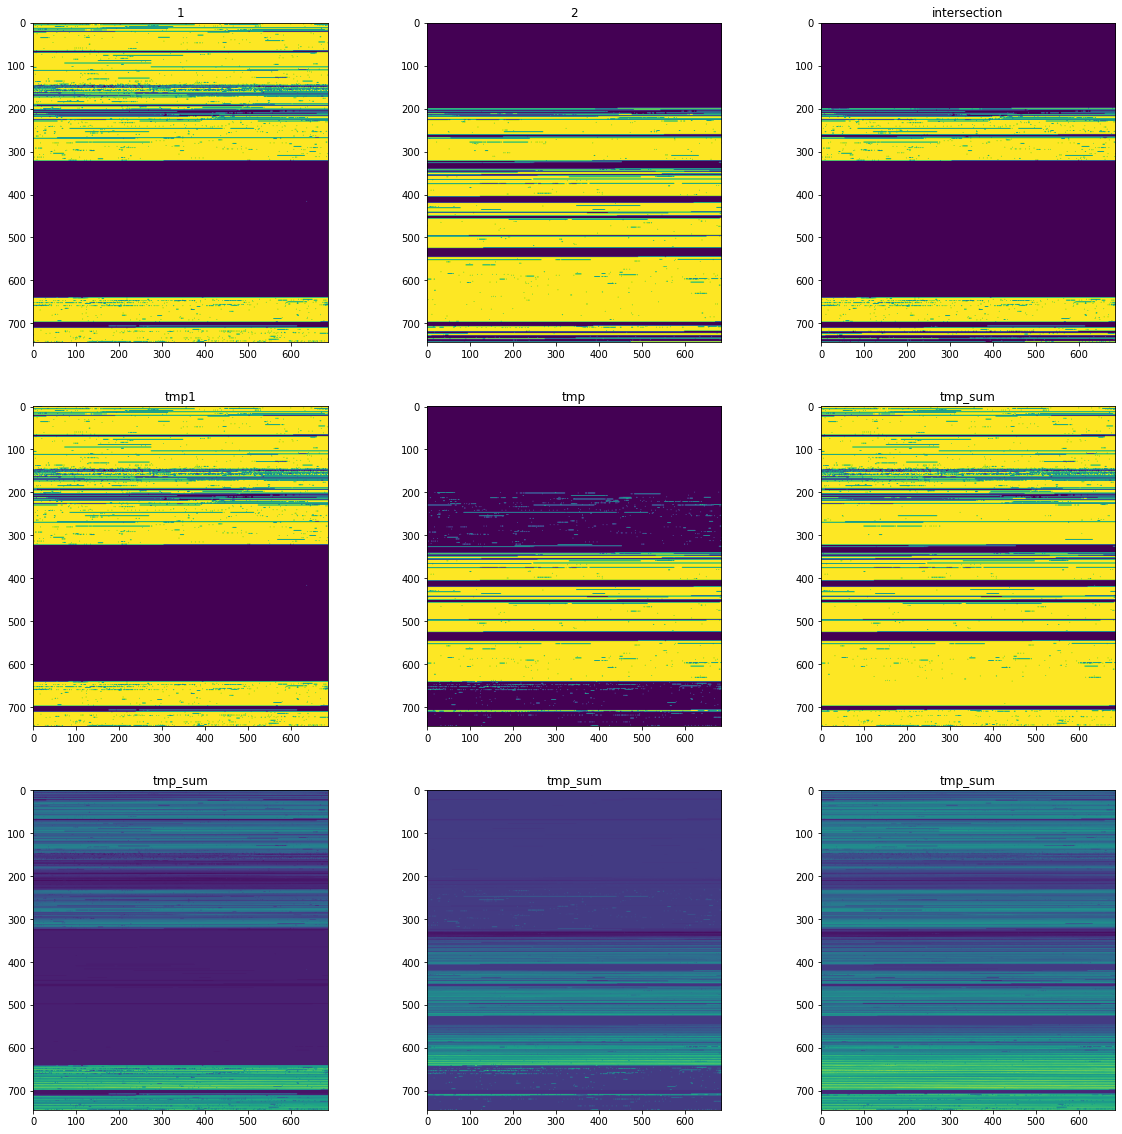

In [9]:
comb_list = [38,48,53,67,68,72]
for item in comb_list[:1]:
    # print(comb[item])
    plt.figure(figsize=(20,20))
    intersection_comb = results_ones.T[comb[item][0]] * results_ones.T[comb[item][1]]

    locs = np.where(intersection_comb > 0)

    tmp1 = results_ones.T[comb[item][0]].copy()
    tmp = results_ones.T[comb[item][1]].copy()
    tmp[locs] = 0


    value1 = results.T[comb[item][0]].copy()
    value2 = results.T[comb[item][1]].copy()
    value3 = results.T[comb[item][1]].copy()
    value2[locs] = 0

    value = value1+value2

    plt.subplot(331)
    plt.imshow(results_ones.T[comb[item][0]].reshape(745,686))
    plt.title('1')
    plt.subplot(332)
    plt.imshow(results_ones.T[comb[item][1]].reshape(745,686))
    plt.title('2')
    plt.subplot(333)
    plt.imshow(intersection_comb.reshape(745,686))
    plt.title('intersection')
    plt.subplot(334)
    plt.imshow(tmp1.reshape(745,686))
    plt.title('tmp1')
    plt.subplot(335)
    plt.imshow(tmp.reshape(745,686))
    plt.title('tmp')
    plt.subplot(336)
    plt.imshow((tmp+tmp1).reshape(745,686))
    plt.title('tmp_sum')

    plt.subplot(337)
    plt.imshow((value1).reshape(745,686))
    plt.title('tmp_sum')

    plt.subplot(338)
    plt.imshow((value2).reshape(745,686))
    plt.title('tmp_sum')

    plt.subplot(339)
    plt.imshow((value).reshape(745,686))
    plt.title('tmp_sum')




(44, 105)
(64, 99)
(43, 106)
(94, 107)
(79, 95)
(85, 89)


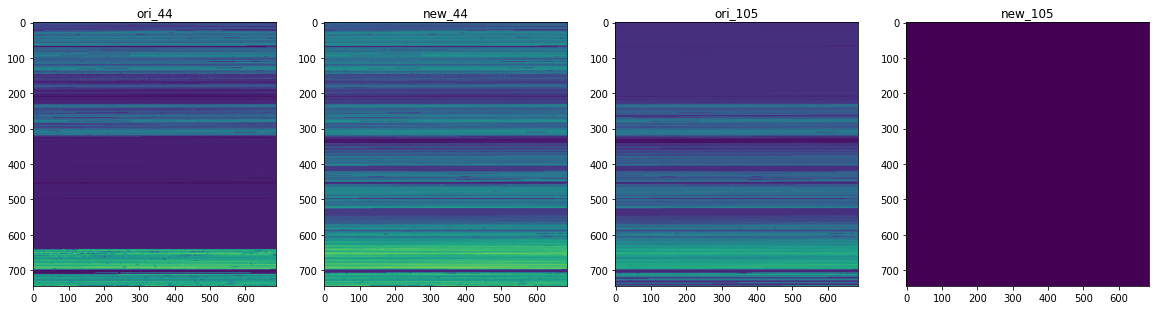

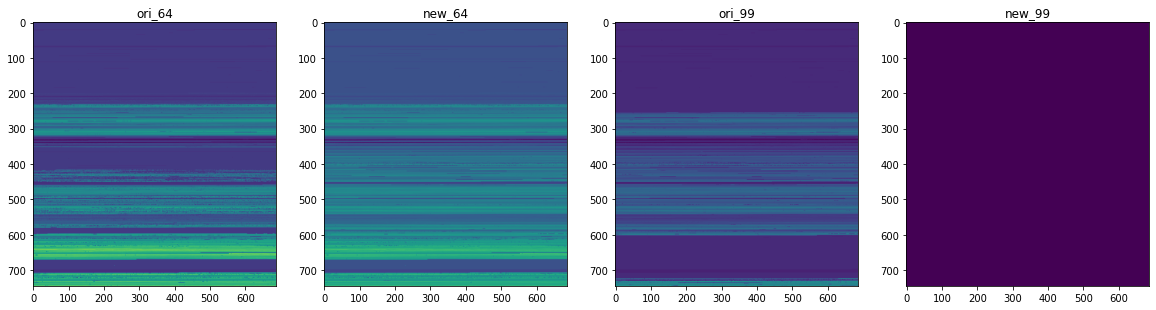

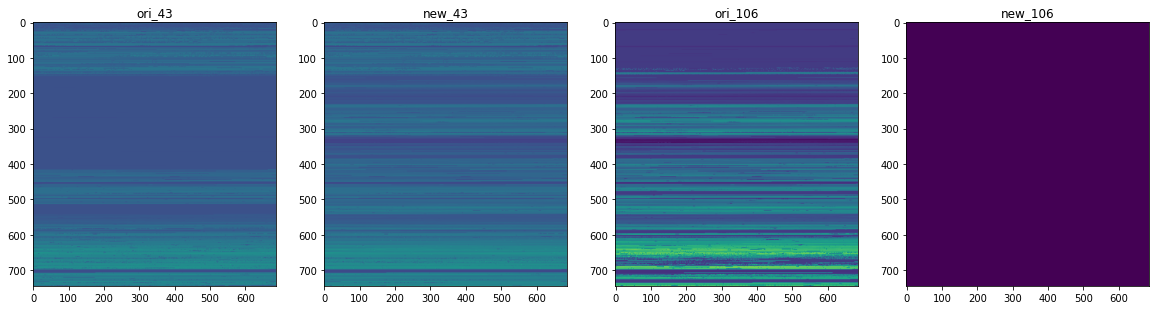

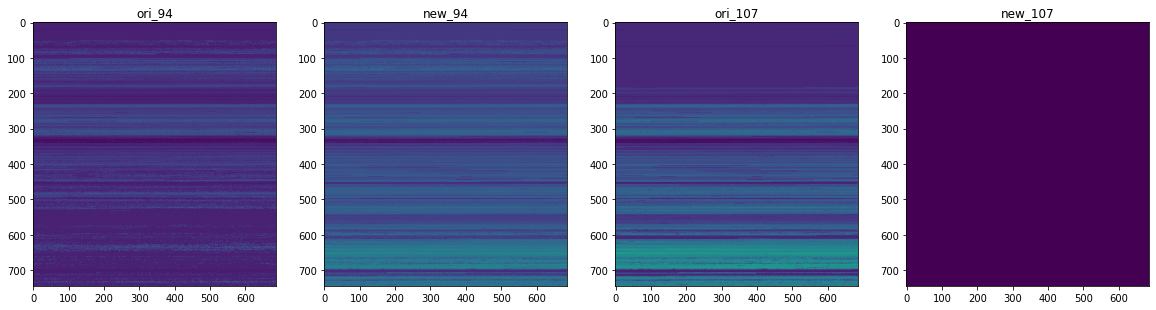

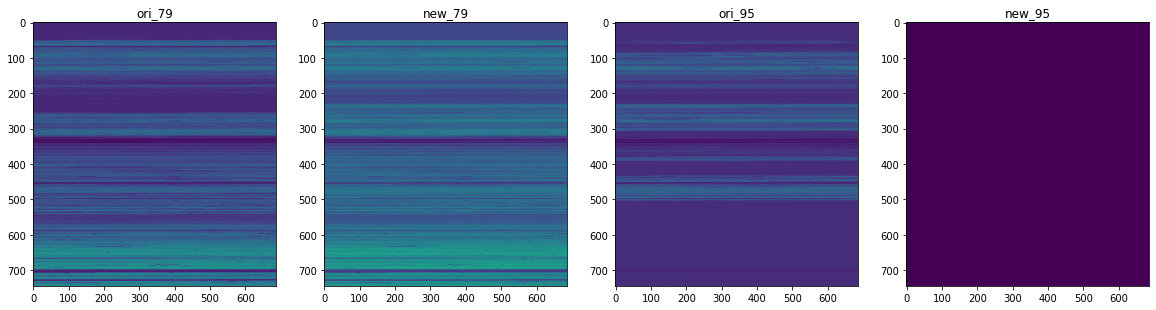

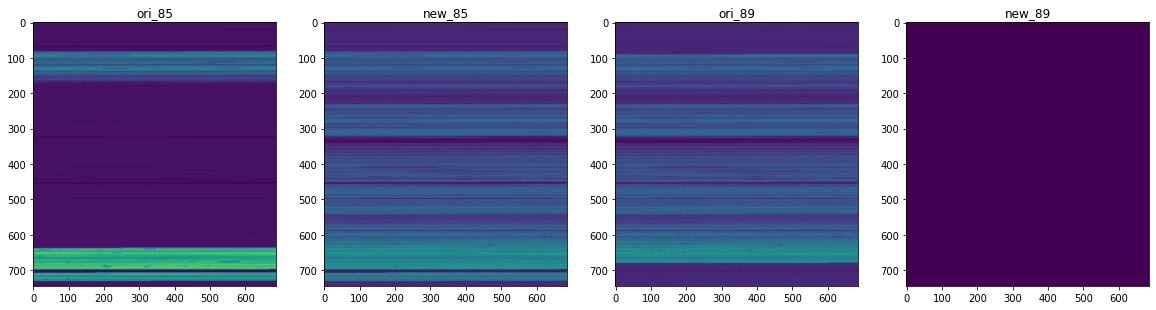

In [15]:
comb_list = [38,48,53,67,68,72]
new_result = results.copy()
zeros = np.zeros_like(new_result.T[0])

for item in comb_list:
    # print(comb[item])
    intersection_comb = results_ones.T[comb[item][0]] * results_ones.T[comb[item][1]]

    locs = np.where(intersection_comb > 0)

    # tmp1 = results_ones.T[comb[item][0]].copy()
    # tmp = results_ones.T[comb[item][1]].copy()
    # tmp[locs] = 0

    value1 = results.T[comb[item][0]].copy()
    value2 = results.T[comb[item][1]].copy()
    value2[locs] = 0

    value = value1+value2

    new_result.T[comb[item][0]] = value
    new_result.T[comb[item][1]] = zeros

    print(comb[item])

    plt.figure(figsize=(20,20))

    plt.subplot(141)
    plt.imshow(results.T[comb[item][0]].reshape(745,686))
    plt.title('ori_{}'.format(comb[item][0]))

    
    plt.subplot(142)
    plt.imshow(new_result.T[comb[item][0]].reshape(745,686))
    plt.title('new_{}'.format(comb[item][0]))


    plt.subplot(143)
    plt.imshow(results.T[comb[item][1]].reshape(745,686))
    plt.title('ori_{}'.format(comb[item][1]))


    plt.subplot(144)
    plt.imshow(new_result.T[comb[item][1]].reshape(745,686))
    plt.title('new_{}'.format(comb[item][1]))

In [27]:
#update total_id_list
new_id_list = []

drop_id_list = []
remain_id_list = []

for item in comb_list:
    remain_id_list.append(comb[item][0])
    drop_id_list.append(comb[item][1])
    # print(comb[item])

print('re:',remain_id_list)
print('drop:',drop_id_list)

for id in total_id_list:
    if id in drop_id_list:
        pass
    else:
        new_id_list.append(id)

print('new_id_list: ',new_id_list)
print('total_id_list: ',total_id_list)



re: [44, 64, 43, 94, 79, 85]
drop: [105, 99, 106, 107, 95, 89]
new_id_list:  [3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 21, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 75, 76, 79, 80, 81, 82, 84, 85, 87, 88, 92, 93, 94, 96, 97, 98, 100, 103, 104, 109, 111, 121, 122]
total_id_list:  [3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 21, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 75, 76, 79, 80, 81, 82, 84, 85, 87, 88, 89, 92, 93, 94, 95, 96, 97, 98, 99, 100, 103, 104, 105, 106, 107, 109, 111, 121, 122]


In [38]:
new_result_ones = np.ones_like(new_result)
locs_0 = np.where(new_result == 0)
new_result_ones[locs_0] = 0

In [56]:
def compute_intersection(id_pair):
    v1 = new_result_ones.T[id_pair[0]]
    v2 = new_result_ones.T[id_pair[1]]
    plt.figure(figsize=(20,10))

    # plt.subplot(131)
    # plt.imshow(v1.reshape(745,686))
    # plt.subplot(132)
    # plt.imshow(v2.reshape(745,686))
    # plt.plot(v2)
    # plt.subplot(133)
    # plt.imshow((v1*v2).reshape(745,686))

    v3 = v1*v2
    r3 = len(np.where(v1*v2 == 1)[0])/len(v1)
    print(r3)

    # plt.plot(v1*v2)

In [46]:
comb_new1 = []
res1 = []
res2 = []
res3 = []
res4 = []

for pair in pairs:
    print('-----')
    for c in combinations(pair[1],2):
        comb_new1.append(c)
        tmp_sum = np.ones_like(results.T[0])

        v1 = tmp_sum*new_result_ones.T[c[0]]
        v2 = tmp_sum*new_result_ones.T[c[1]]


        r1 = len(np.where(v1 == 1)[0])/len(tmp_sum)
        r2 = len(np.where(v2 == 1)[0])/len(tmp_sum)

        v3 = v1+v2
        r3 = len(np.where(v3 >= 1)[0])/len(tmp_sum)

        v3 = v1*v2
        r4 = len(np.where(v3==1)[0])/len(tmp_sum)


        res1.append(r1)
        res2.append(r2)
        res3.append(r3)
        res4.append(r4)

        print(c,r1,r2,r3,r4)




-----
(3, 23) 0.8190639247069873 0.9394877414052869 0.9710998493357075 0.7874518167765668
(3, 42) 0.8190639247069873 0.9046118926957168 0.9522374625785117 0.7714383548241924
(23, 42) 0.9394877414052869 0.9046118926957168 0.9755708611344825 0.8685287729665212
-----
(5, 17) 0.8637505625452482 0.9159449781830278 0.9688496683428884 0.8108458723853875
-----
(21, 26) 0.8178233901422506 0.9456414972508659 0.9704717553368423 0.7929931320562741
(21, 41) 0.8178233901422506 0.9345119063924707 0.9767213884595065 0.7756139080752148
(26, 41) 0.9456414972508659 0.9345119063924707 0.9771949048075607 0.902958498835776
-----
(14, 30) 0.9065098714461816 0.8658187723795174 0.9849609642514724 0.7873676795742266
(14, 39) 0.9065098714461816 0.8875261705832861 0.995642475590428 0.7983935664390397
(14, 56) 0.9065098714461816 0.6724088676697908 0.9643630031111198 0.6145557360048526
(30, 39) 0.8658187723795174 0.8875261705832861 0.9756236914708357 0.7777212514919678
(30, 56) 0.8658187723795174 0.6724088676697908

/tmp/ipykernel_1428343/1236484024.py:7: RuntimeWarning: divide by zero encountered in true_divide
  rates = 1/(res4)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx

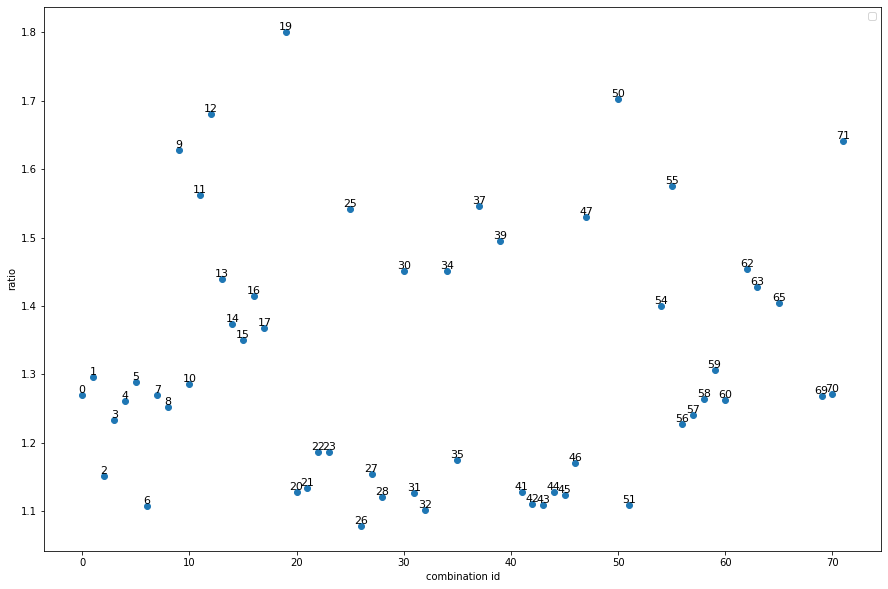

In [52]:
res1 = np.array(res1)
res2 = np.array(res2)
res3 = np.array(res3)
res4 = np.array(res4)

# rates = (res1+res2)/res4
rates = 1/(res4)

plt.figure(figsize=(15,10))
plt.plot(rates,"o",gid=res1)
plt.xlabel('combination id')
plt.ylabel('ratio')
for a,b in zip(range(0,len(res1)),rates):
    plt.text(a,b,a,ha='center',va='bottom',fontsize=11)
plt.legend()
plt.savefig('combination_rate1.png',dpi=300,pad_inches=0,bbox_inches='tight')
# plt.show()

In [55]:
comb_list_new = [19,50,12,71,9]
for comb_id in comb_list_new:
    print(comb_id,comb_new1[comb_id])
# comb_new1[19]

19 (9, 121)
50 (13, 40)
12 (39, 56)
71 (10, 19)
9 (14, 56)


In [57]:
print(comb_new1)

[(3, 23), (3, 42), (23, 42), (5, 17), (21, 26), (21, 41), (26, 41), (14, 30), (14, 39), (14, 56), (30, 39), (30, 56), (39, 56), (9, 15), (9, 18), (9, 24), (9, 37), (9, 44), (9, 105), (9, 121), (15, 18), (15, 24), (15, 37), (15, 44), (15, 105), (15, 121), (18, 24), (18, 37), (18, 44), (18, 105), (18, 121), (24, 37), (24, 44), (24, 105), (24, 121), (37, 44), (37, 105), (37, 121), (44, 105), (44, 121), (105, 121), (12, 45), (12, 46), (45, 46), (8, 25), (8, 36), (25, 36), (64, 75), (64, 99), (75, 99), (13, 40), (34, 43), (34, 106), (43, 106), (70, 122), (49, 68), (66, 72), (54, 73), (32, 35), (32, 50), (32, 94), (32, 107), (35, 50), (35, 94), (35, 107), (50, 94), (50, 107), (94, 107), (79, 95), (92, 97), (33, 53), (10, 19), (85, 89)]


In [31]:
#dump
# with open('readings_timeid_sa1.pkl','wb') as f:
    # pickle.dump(new_result,f)

#load
with open('readings_timeid_sa1.pkl','rb') as f:
    new_result = pickle.load(f)

# with open('readings_timeid.pkl','rb') as f:
    # results = pickle.load(f)
# len(total_id_list)

In [32]:
# 验证平均值是否发生改变
loc1 = np.where(value1 > 0)
print('原始1: ',np.mean(value1[loc1]))
print('原始1_var: ',np.std(value1[loc1]))
print('--------------------')

loc2 = np.where(value2 > 0)
print('剔除掉交集的2: ',np.mean(value2[loc2]))
print('剔除掉交集的2_var: ',np.std(value2[loc2]))
print('--------------------')

loc3 = np.where(value3 > 0)
print('原始2: ',np.mean(value3[loc3]))
print('原始2_var: ',np.std(value3[loc3]))
print('--------------------')

loc4 = np.where(value > 0)
print('合并后: ',np.mean(value[loc4]))
print('合并后_var: ',np.std(value[loc4]))


原始1:  11.519796143107365
原始1_var:  5.613817739744312
--------------------
剔除掉交集的2:  6.632300412204645
剔除掉交集的2_var:  3.76018139127589
--------------------
原始2:  9.149063942751614
原始2_var:  5.639868704348615
--------------------
合并后:  8.049850984739795
合并后_var:  4.904137946277074
